## **Step 1: Importing neccessary libraries**

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import warnings
warnings.filterwarnings(action = "ignore")

## **Step 2: Importing the dataset**

In [2]:
data = pd.read_csv("Amazon_Cell_Phones.csv", encoding = "unicode_escape")

## **Step 3: Sanity check of data**

In [3]:
# to get first two rows of data
data.shape

(3351, 19)

In [4]:
data.head(2)

,ID,product_name,product_link,image_link,Price (Dollar),discount_percentage,price_before_discount,rating_out_of_5,number_of_ratings,brand,operating_system,RAM (GB),CPU,Storage (GB),screen_size (Inches),cellular_technology,model_name,cpu_model,available_colors
0,1,"Apple iPhone XR, 64GB, Black - Unlocked (Renewed)",https://www.amazon.com/Apple-iPhone-XR-Fully-U...,https://m.media-amazon.com/images/I/717KHGCJ6e...,168.39,5.93,179.0,4.4,64918.0,Apple,iOS 12,3.0,NaN,64.0,6.1,"LTE, CDMA, EV-DO, UMTS, HSPA, HSDPA, GSM, EDGE",iPhone XR,NaN,"Black, Blue, Coral, Red, White, Yellow"
1,2,"Apple iPhone 11, 64GB, Black - Unlocked (Renewed)",https://www.amazon.com/Apple-iPhone-11-64GB-Bl...,https://m.media-amazon.com/images/I/612kg3rGyY...,230.00,0.00,NaN,4.2,52613.0,Apple,iOS 16,4.0,NaN,64.0,6.1,4G,iPhone 11,NaN,"Black, Green, Purple, Red, White, Yellow"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3351 non-null   int64  
 1   product_name           3351 non-null   object 
 2   product_link           3351 non-null   object 
 3   image_link             3351 non-null   object 
 4   Price (Dollar)         2347 non-null   float64
 5   discount_percentage    3351 non-null   float64
 6   price_before_discount  569 non-null    float64
 7   rating_out_of_5        3117 non-null   float64
 8   number_of_ratings      3117 non-null   float64
 9   brand                  3347 non-null   object 
 10  operating_system       2947 non-null   object 
 11  RAM (GB)               1894 non-null   float64
 12  CPU                    1222 non-null   object 
 13  Storage (GB)           3256 non-null   float64
 14  screen_size (Inches)   3163 non-null   float64
 15  cell

In [6]:
# missing values
data.isnull().sum()

ID                          0
product_name                0
product_link                0
image_link                  0
Price (Dollar)           1004
discount_percentage         0
price_before_discount    2782
rating_out_of_5           234
number_of_ratings         234
brand                       4
operating_system          404
RAM (GB)                 1457
CPU                      2129
Storage (GB)               95
screen_size (Inches)      188
cellular_technology       541
model_name                166
cpu_model                2775
available_colors         2064
dtype: int64

<Axes: >

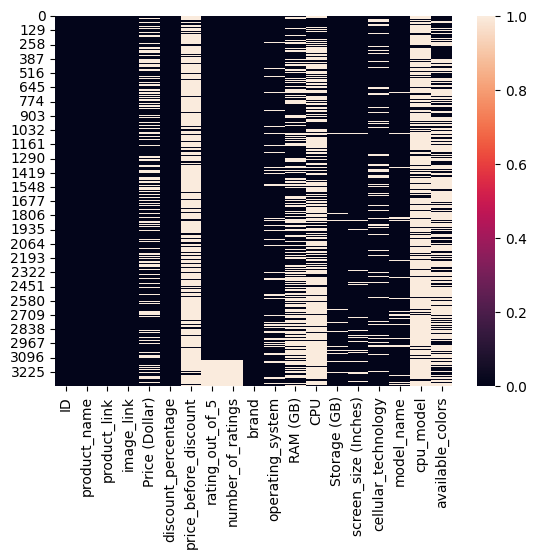

In [7]:
# Graphical Representation
sns.heatmap(data.isnull())

## **Step 4: Data Cleaning and Preprocessing**

In [8]:
# Percentage of missing values
data.isnull().sum()/data.shape[0]

ID                       0.000000
product_name             0.000000
product_link             0.000000
image_link               0.000000
Price (Dollar)           0.299612
discount_percentage      0.000000
price_before_discount    0.830200
rating_out_of_5          0.069830
number_of_ratings        0.069830
brand                    0.001194
operating_system         0.120561
RAM (GB)                 0.434796
CPU                      0.635333
Storage (GB)             0.028350
screen_size (Inches)     0.056103
cellular_technology      0.161444
model_name               0.049537
cpu_model                0.828111
available_colors         0.615936
dtype: float64

In [9]:
# Overall percent of missing values
(data.isnull().sum().sum()/(data.shape[0] * data.shape[1])) * 100

22.109660902480012

In [10]:
# Let's treat the missing values for numerical data
data['Price (Dollar)'].fillna(data['Price (Dollar)'].mean(), inplace=True) 
data['RAM (GB)'].fillna(data['RAM (GB)'].median(), inplace=True)
data['screen_size (Inches)'].fillna(data['screen_size (Inches)'].mean(), inplace=True)
data['rating_out_of_5'].fillna(data['rating_out_of_5'].mean(), inplace=True)

# For categorical columns
data['brand'].fillna(data['brand'].mode()[0], inplace=True)
data['operating_system'].fillna(data['operating_system'].mode()[0], inplace=True)
data['Storage (GB)'].fillna(data['Storage (GB)'].mode()[0], inplace=True)

# Filling CPU with Unknown
data['CPU'].fillna('Unknown', inplace=True)
data['available_colors'].fillna('Unknown', inplace=True)
data['cellular_technology'].fillna('Unknown', inplace=True)
data['model_name'].fillna('Unknown', inplace=True)
data['cpu_model'].fillna('Unknown', inplace=True)
data['price_before_discount'].fillna('unknown', inplace=True)

# Filling with 0
data['number_of_ratings'].fillna(0, inplace=True)

## **Step 5: EDA**

In [11]:
# descriptive_statistics
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,3351.0,NaN,NaN,NaN,1676.0,967.494703,1.0,838.5,1676.0,2513.5,3351.0
product_name,3351,3351,"Apple iPhone XR, 64GB, Black - Unlocked (Renewed)",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_link,3351,3351,https://www.amazon.com/Apple-iPhone-XR-Fully-U...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
image_link,3351,2968,https://m.media-amazon.com/images/I/61afOyd+zE...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price (Dollar),3351.0,NaN,NaN,NaN,278.421172,227.453541,4.89,129.99,278.421172,278.421172,1999.99
discount_percentage,3351.0,NaN,NaN,NaN,3.47678,10.419117,0.0,0.0,0.0,0.0,93.0
price_before_discount,3351,380,unknown,2782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_out_of_5,3351.0,NaN,NaN,NaN,3.837632,0.683109,1.0,3.6,3.9,4.2,5.0
number_of_ratings,3351.0,NaN,NaN,NaN,373.840645,1956.976919,0.0,7.0,45.0,200.0,64918.0
brand,3351,280,SAMSUNG,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **1. Visualize the pairplot of data for numerical columns**

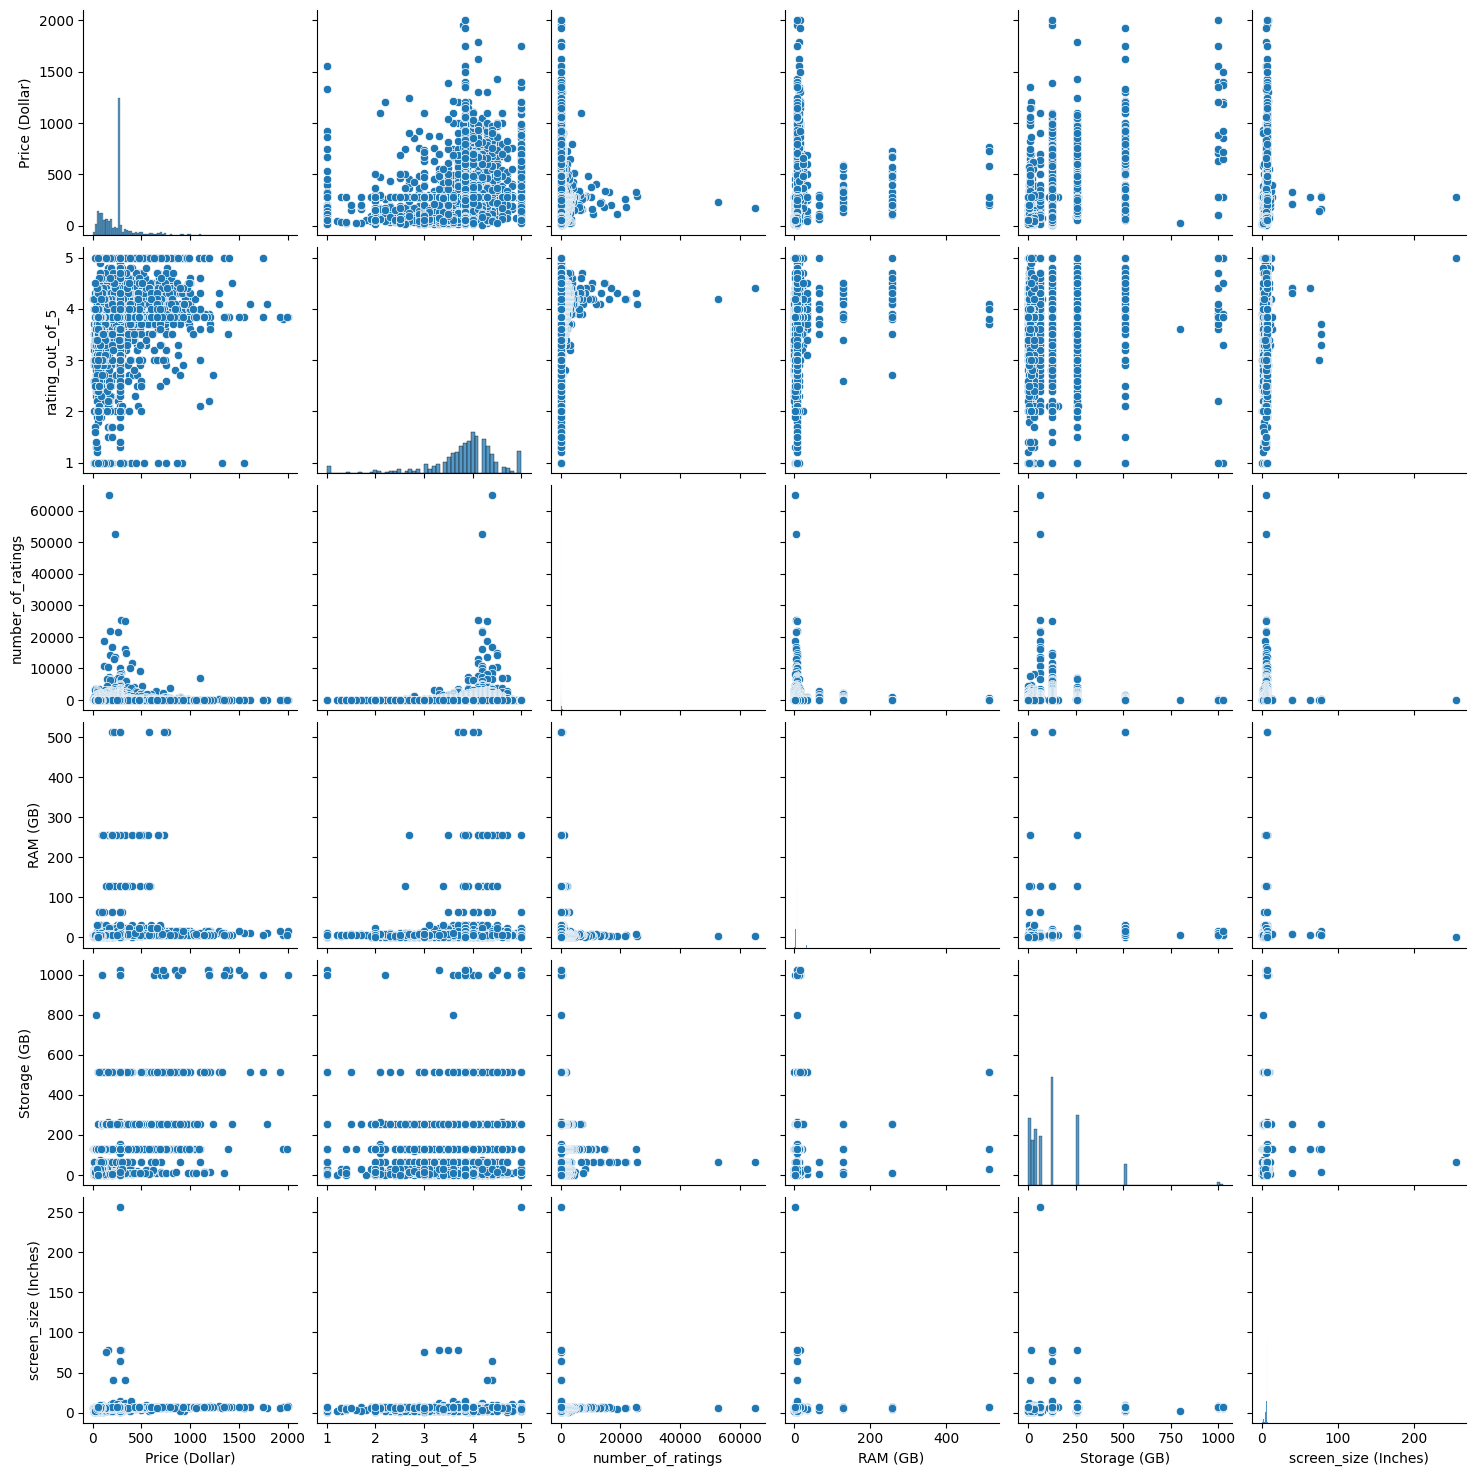

In [12]:
data_numeric = data[['Price (Dollar)', 'rating_out_of_5', 'number_of_ratings', 'RAM (GB)', 'Storage (GB)', 'screen_size (Inches)']]
sns.pairplot(data_numeric)
plt.show()

### **2. Histogram to understand the distribution**

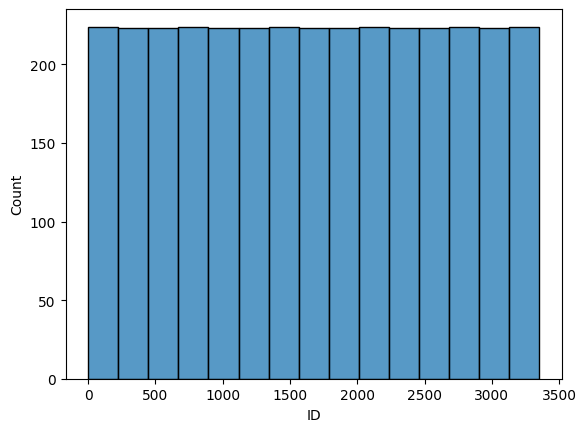

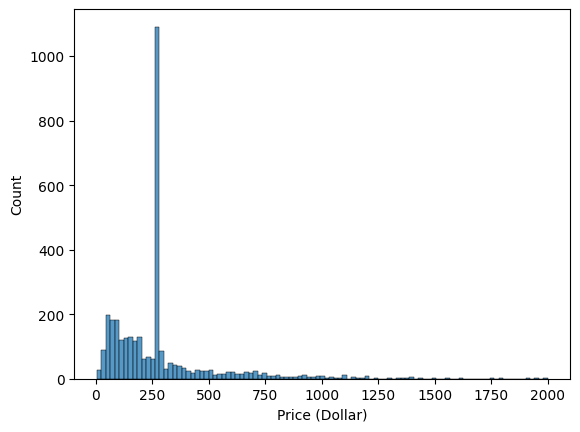

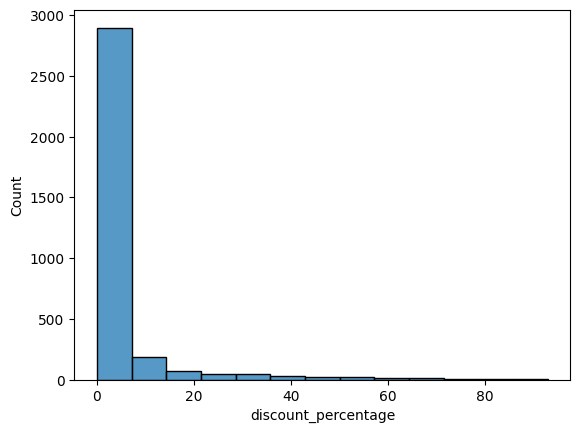

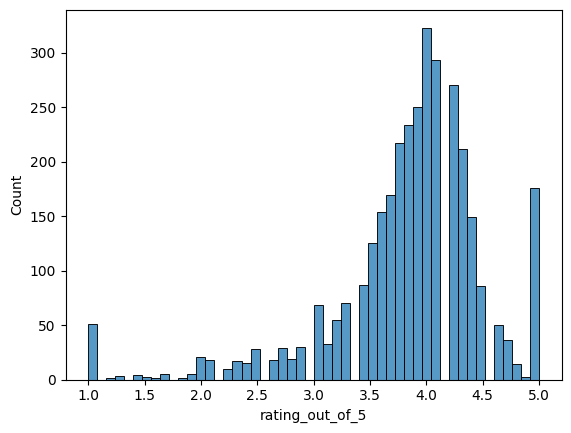

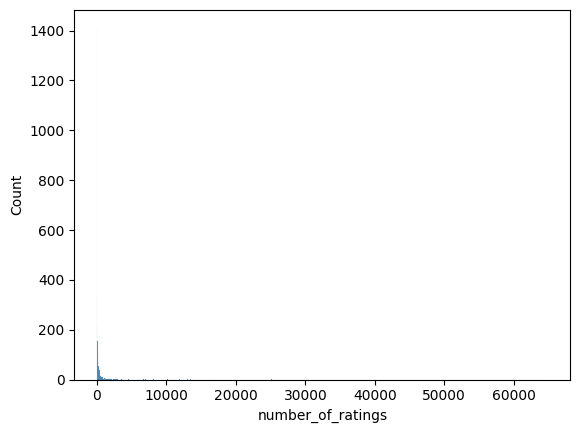

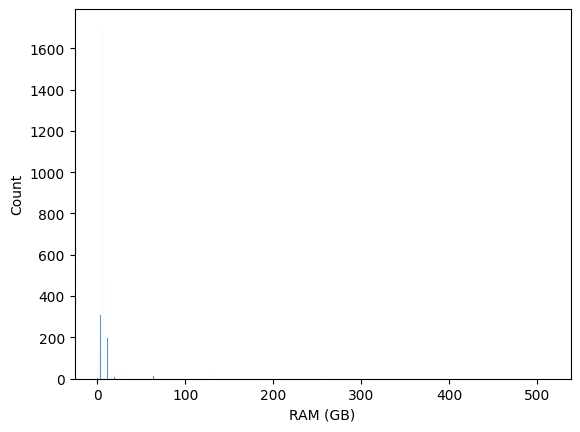

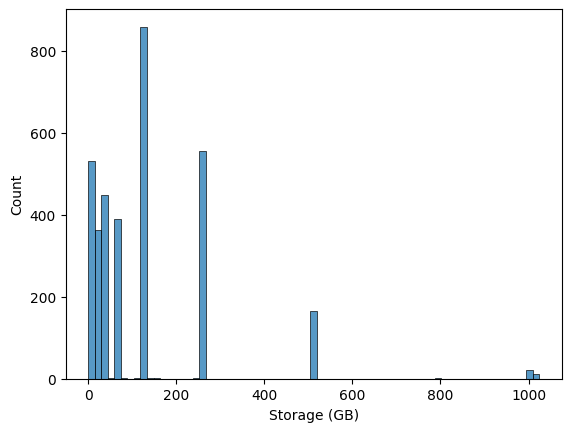

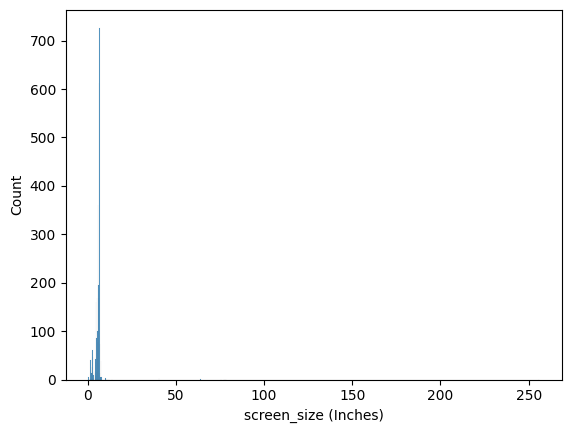

In [13]:
for i in data.select_dtypes(include = "number").columns:
    sns.histplot(data = data, x = i)
    plt.show()

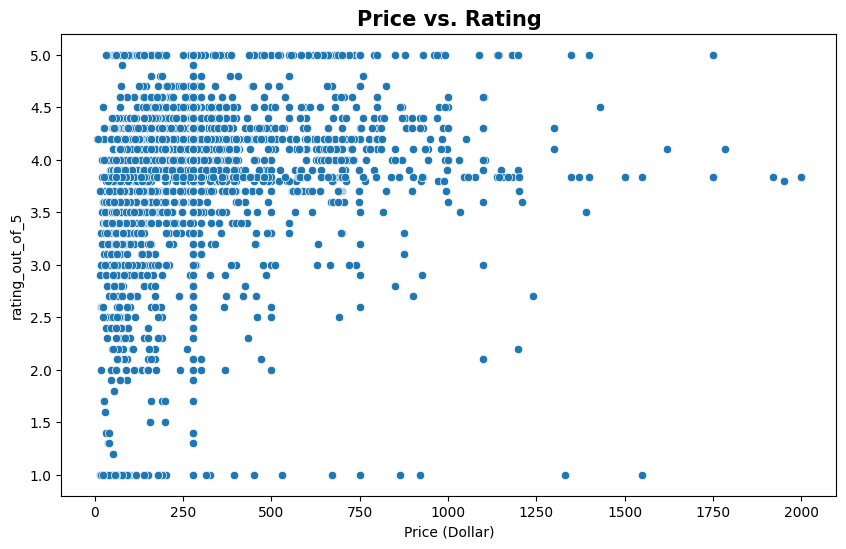

In [14]:
# Scatter plot to see the relationship between price and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price (Dollar)', y='rating_out_of_5', data=data)
plt.title("Price vs. Rating", fontweight = "bold", fontsize = 15)
plt.show()

### **3. Top 15 Brand**

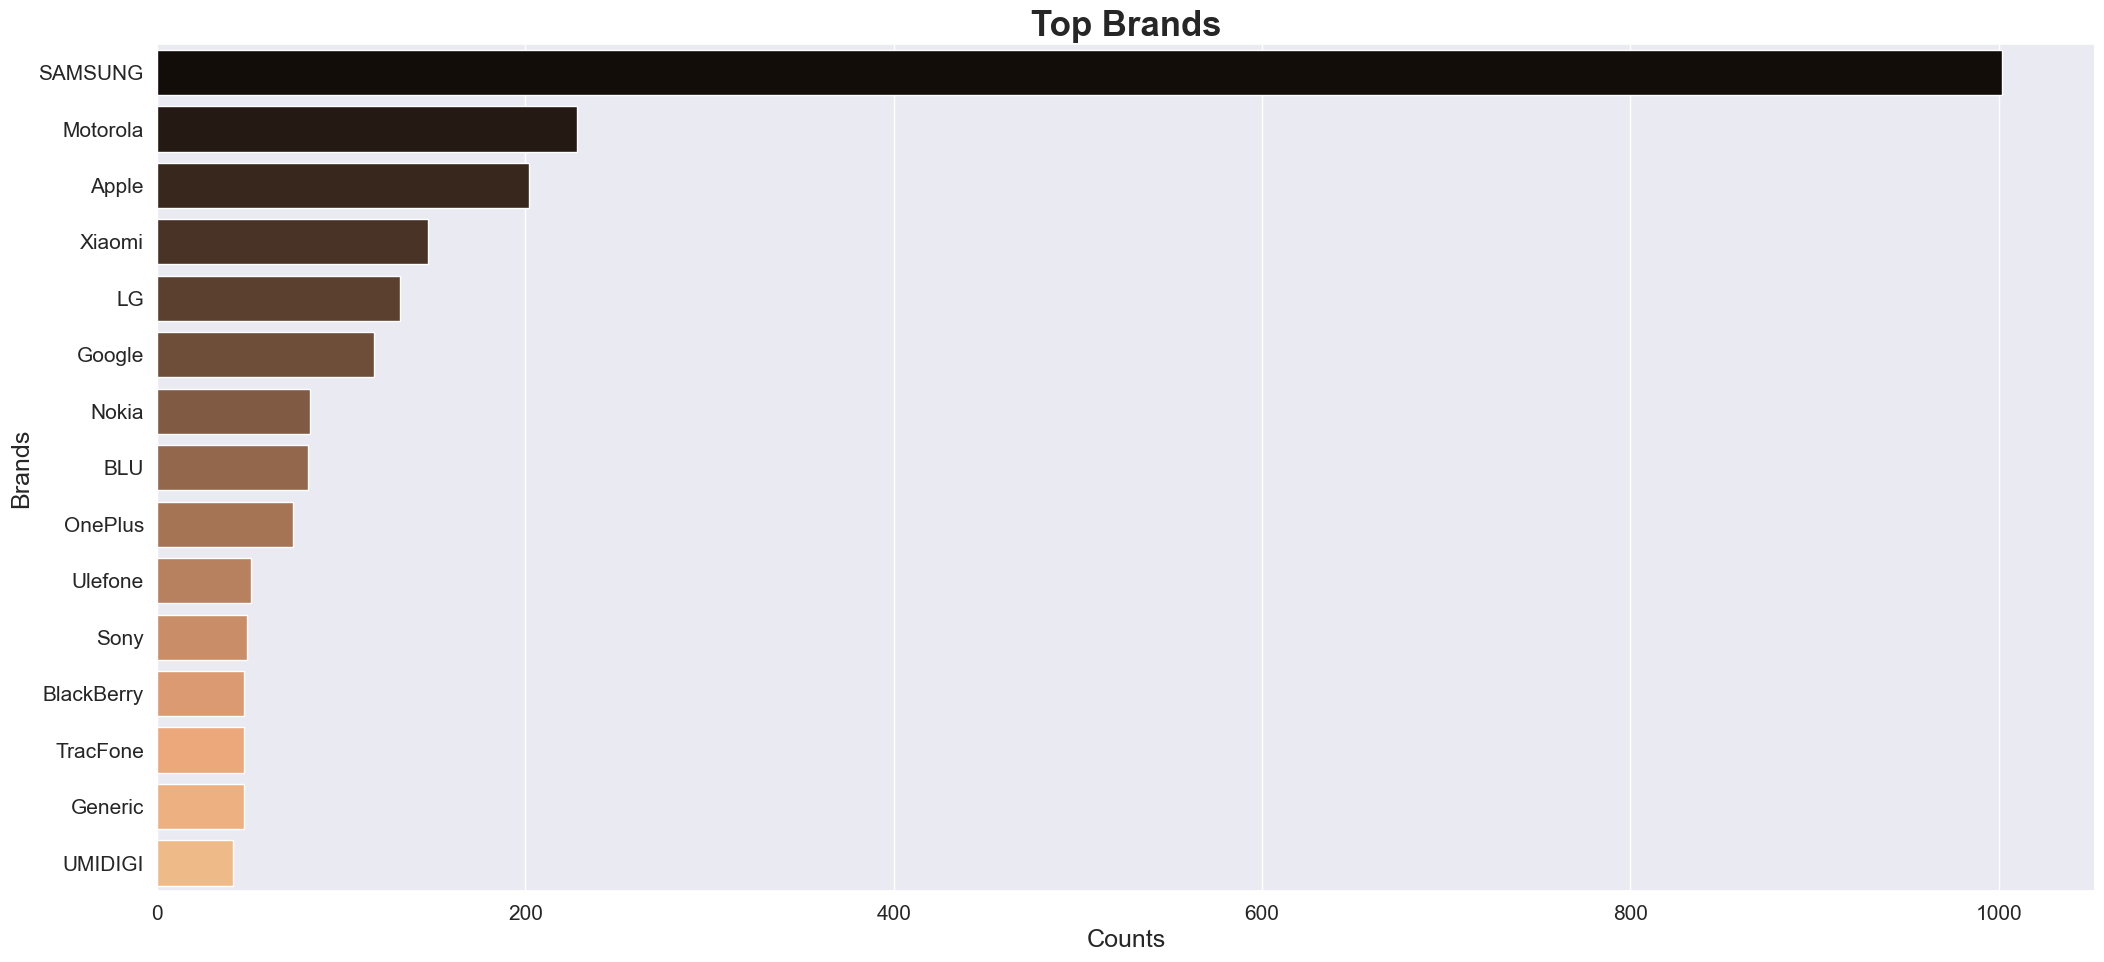

In [15]:
sns.set(rc = {'figure.figsize' : (25, 11)})
top_10_brand = data['brand'].value_counts().head(15).reset_index()
top_10_brand.columns = ['brand','Counts']
sns.barplot(x = "Counts", y = "brand", data = top_10_brand, palette = "copper")
plt.title("Top Brands", fontweight = "bold", fontsize = 25)
plt.xlabel("Counts", fontsize = 18)
plt.ylabel("Brands", fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### **4. Top 15 Brand by Price**

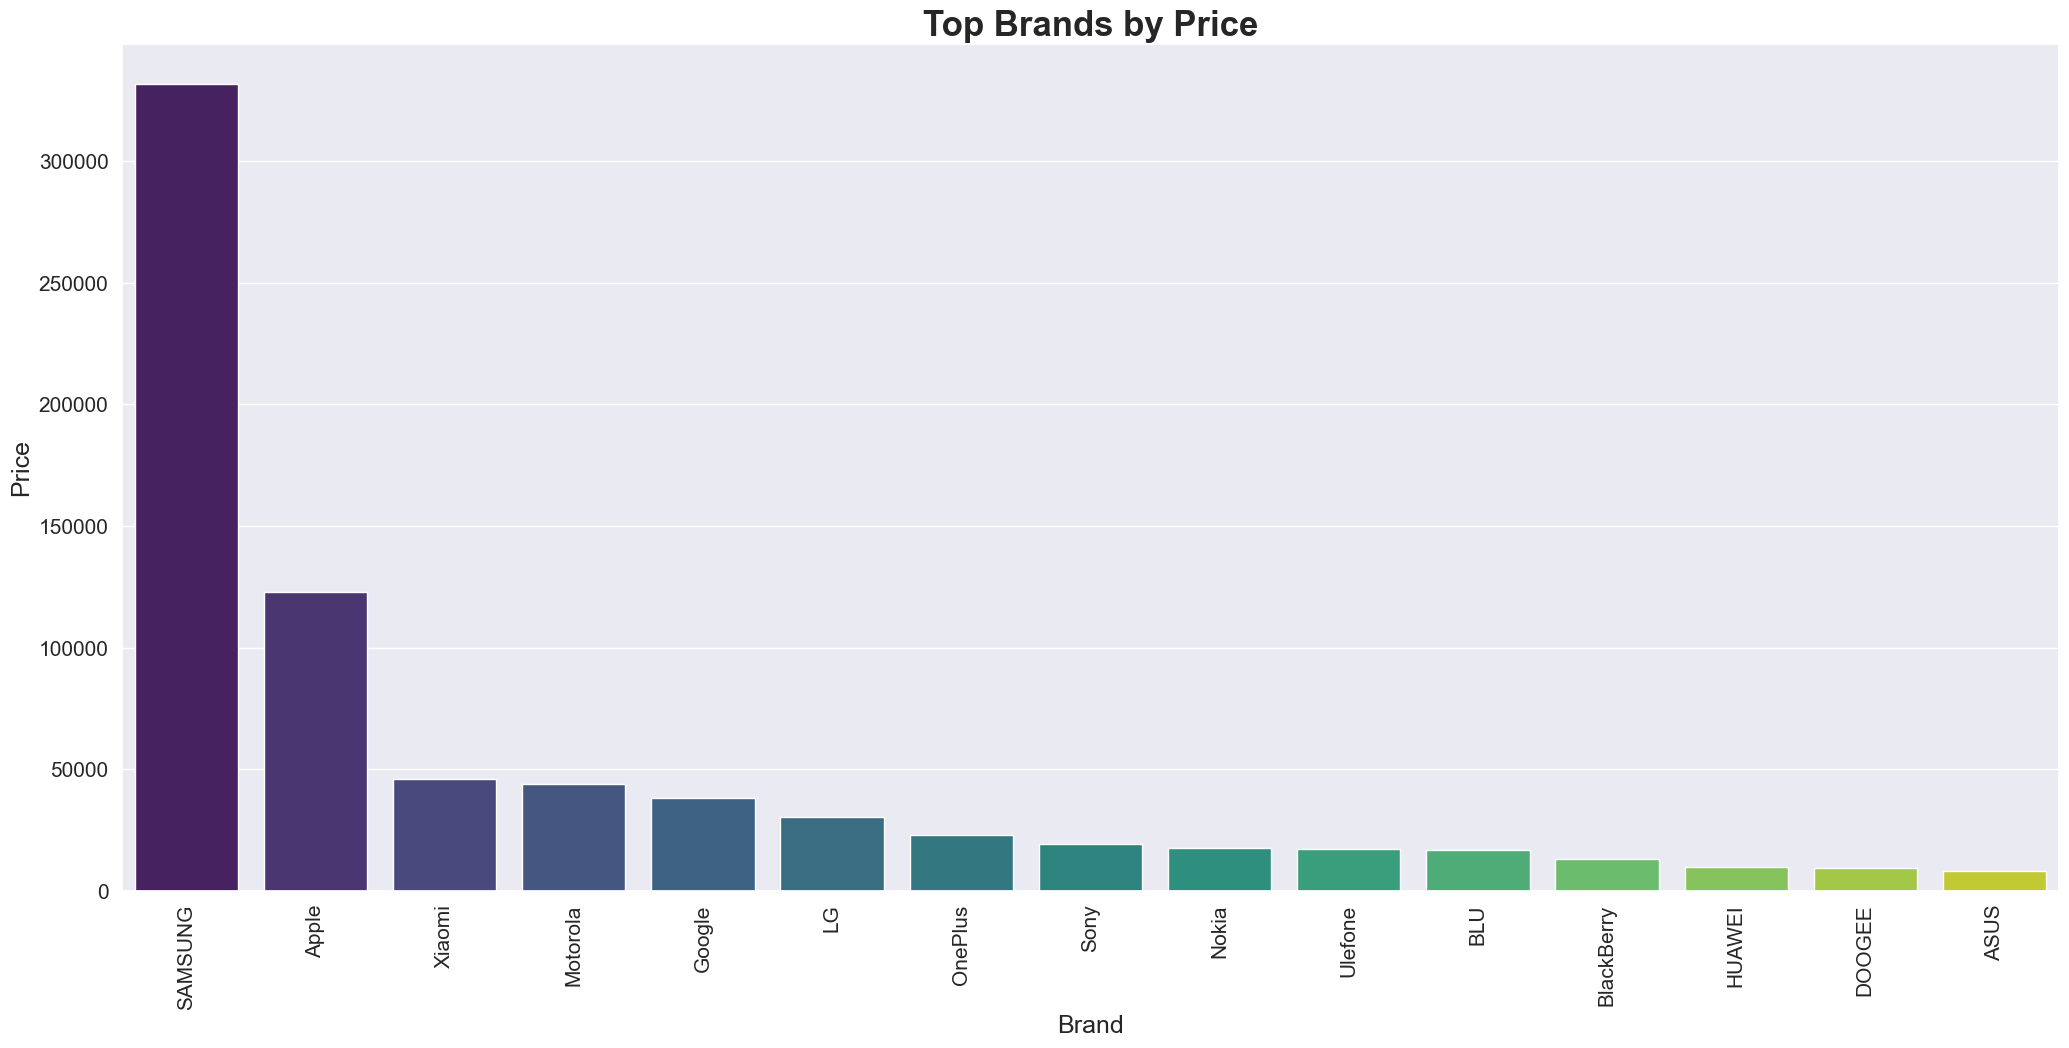

In [16]:
brand_price = data.groupby(["brand"], as_index = False)["Price (Dollar)"].sum().sort_values(by = "Price (Dollar)", ascending = False).head(15)
sns.barplot(x = "brand", y = "Price (Dollar)", data = brand_price, palette = "viridis")
plt.xticks(rotation = 90)
plt.title("Top Brands by Price", fontweight = "bold", fontsize = 25)
plt.xlabel("Brand", fontsize = 18)
plt.ylabel("Price", fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### **5. Top 15 Brand by Discount Percentage**

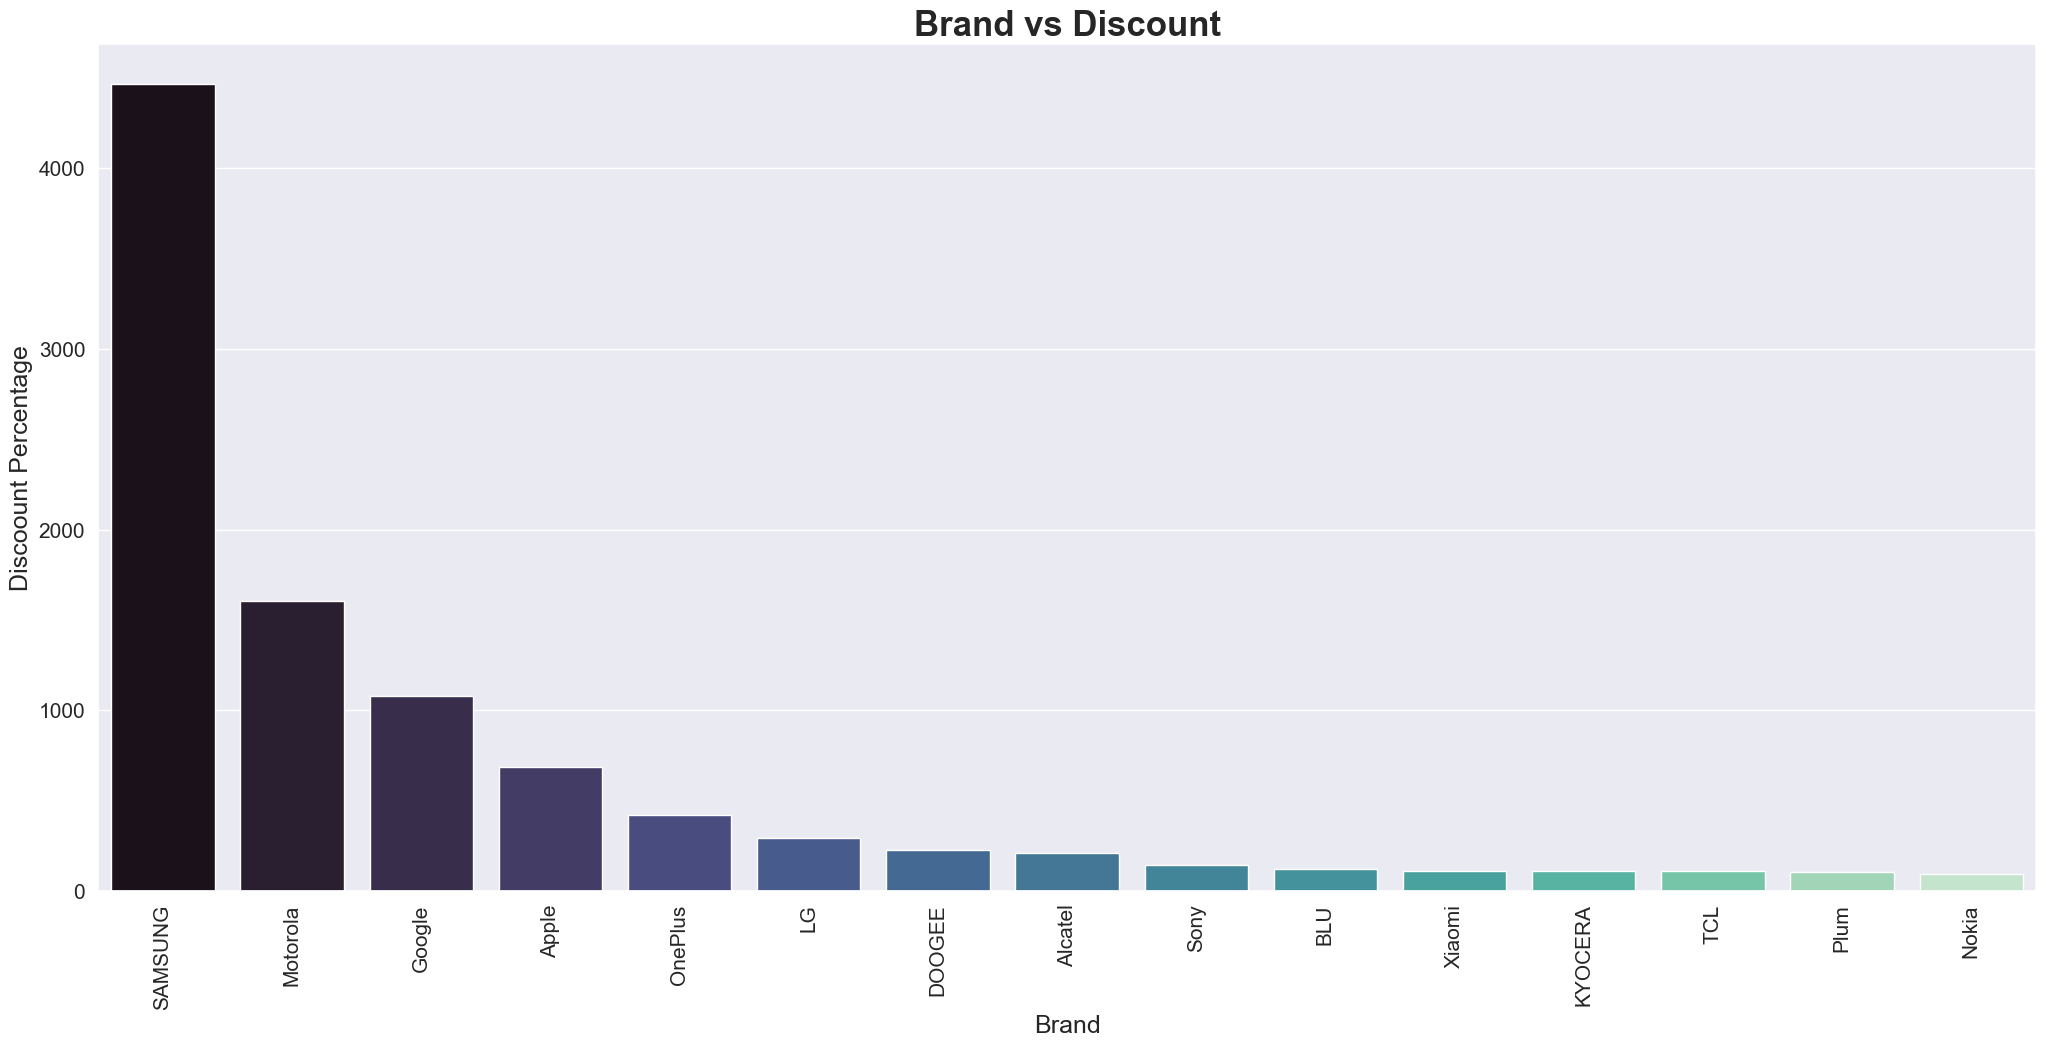

In [17]:
brand_discount = data.groupby(["brand"], as_index = False)["discount_percentage"].sum().sort_values(by = "discount_percentage", ascending = False).head(15)
sns.barplot(x = "brand", y = "discount_percentage", data = brand_discount, palette = "mako")
plt.xticks(rotation = 90)
plt.title("Brand vs Discount", fontweight = "bold", fontsize = 25)
plt.xlabel("Brand", fontsize = 18)
plt.ylabel("Discoount Percentage", fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### **6. Price over the product ID**

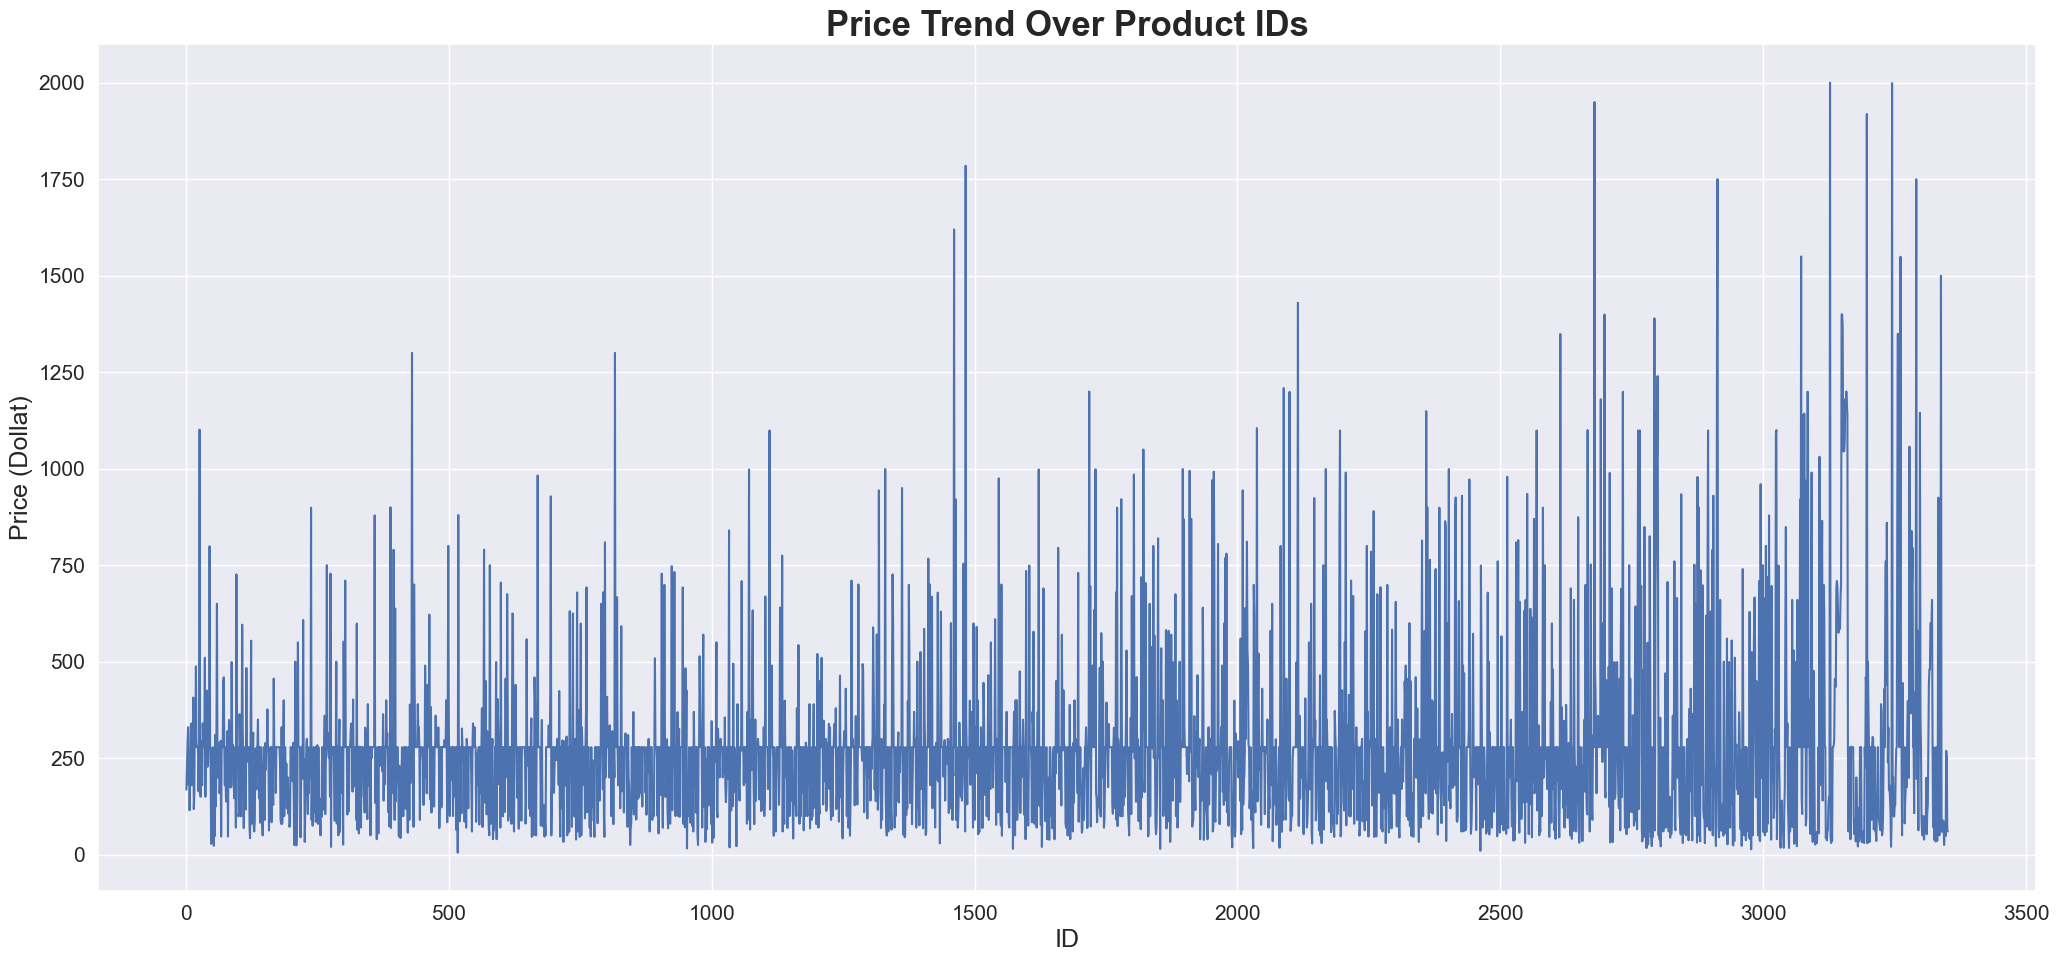

In [18]:
sns.set(rc = {'figure.figsize' : (25, 11)})
sns.lineplot(x = "ID", y = "Price (Dollar)", data=data)
plt.title("Price Trend Over Product IDs", fontweight = "bold", fontsize = 25)
plt.xlabel("ID", fontsize = 18)
plt.ylabel("Price (Dollat)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


### **7. Price vs Rating, separated by brand**

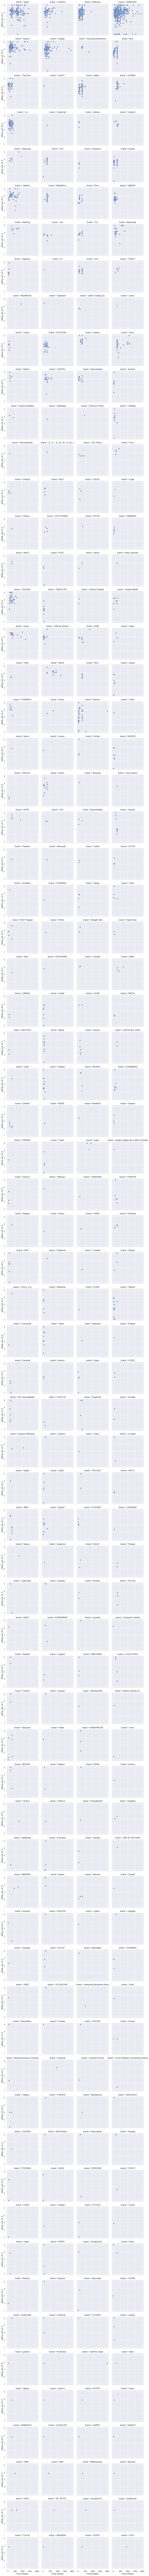

In [19]:
g = sns.FacetGrid(data, col='brand', col_wrap=4, height=3)
g.map(sns.scatterplot, 'Price (Dollar)', 'rating_out_of_5')
plt.show()


### **8. Price vs Rating**

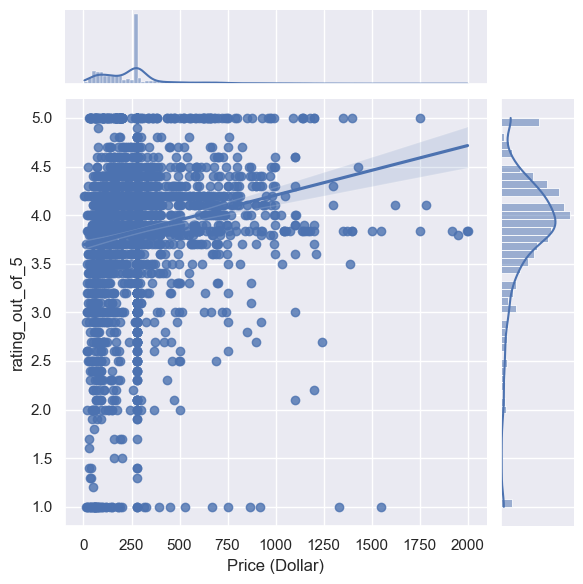

In [20]:
sns.set(rc = {'figure.figsize' : (22, 11)})
sns.jointplot(x = "Price (Dollar)", y = "rating_out_of_5", data = data, kind = "reg")
plt.show()


### **9. Product counts by brand**

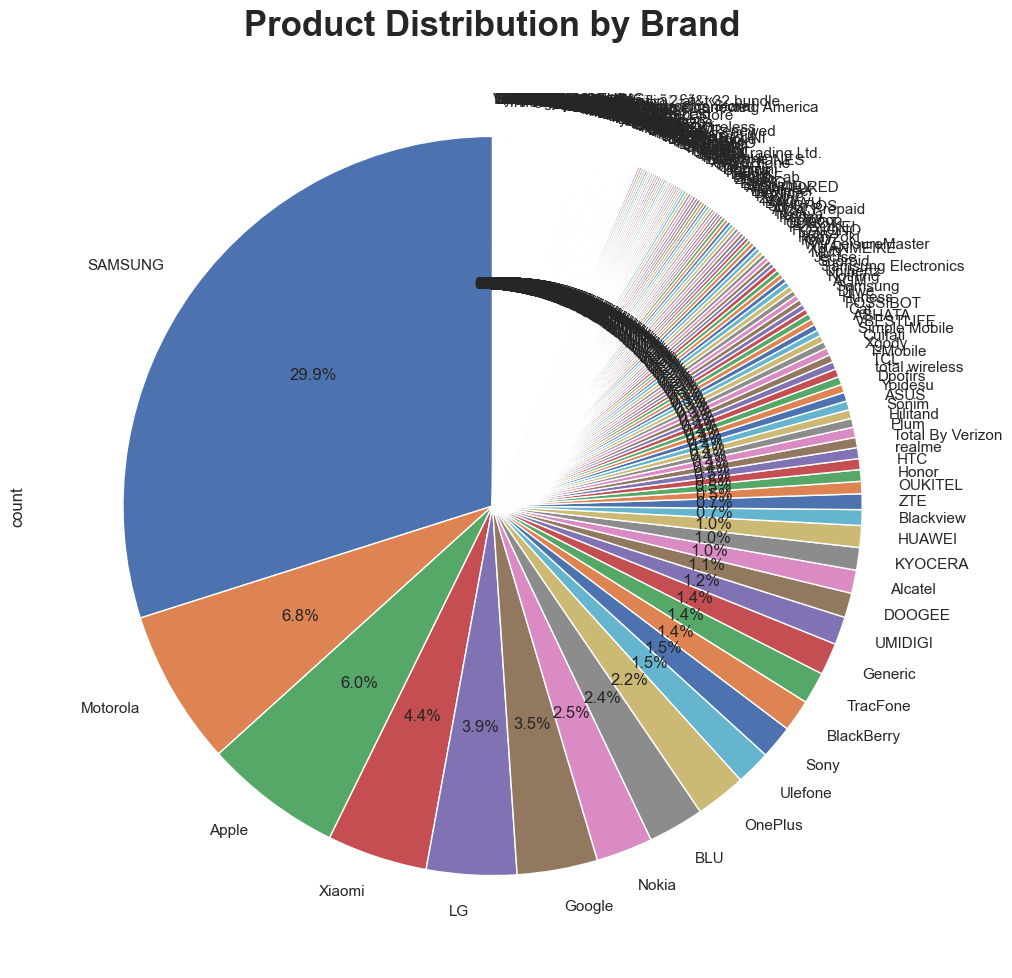

In [21]:
plt.figure(figsize=(25, 12))
data["brand"].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 90)
plt.title('Product Distribution by Brand',  fontweight = "bold", fontsize = 25)
plt.show()

### **9. Price (Dollar)**

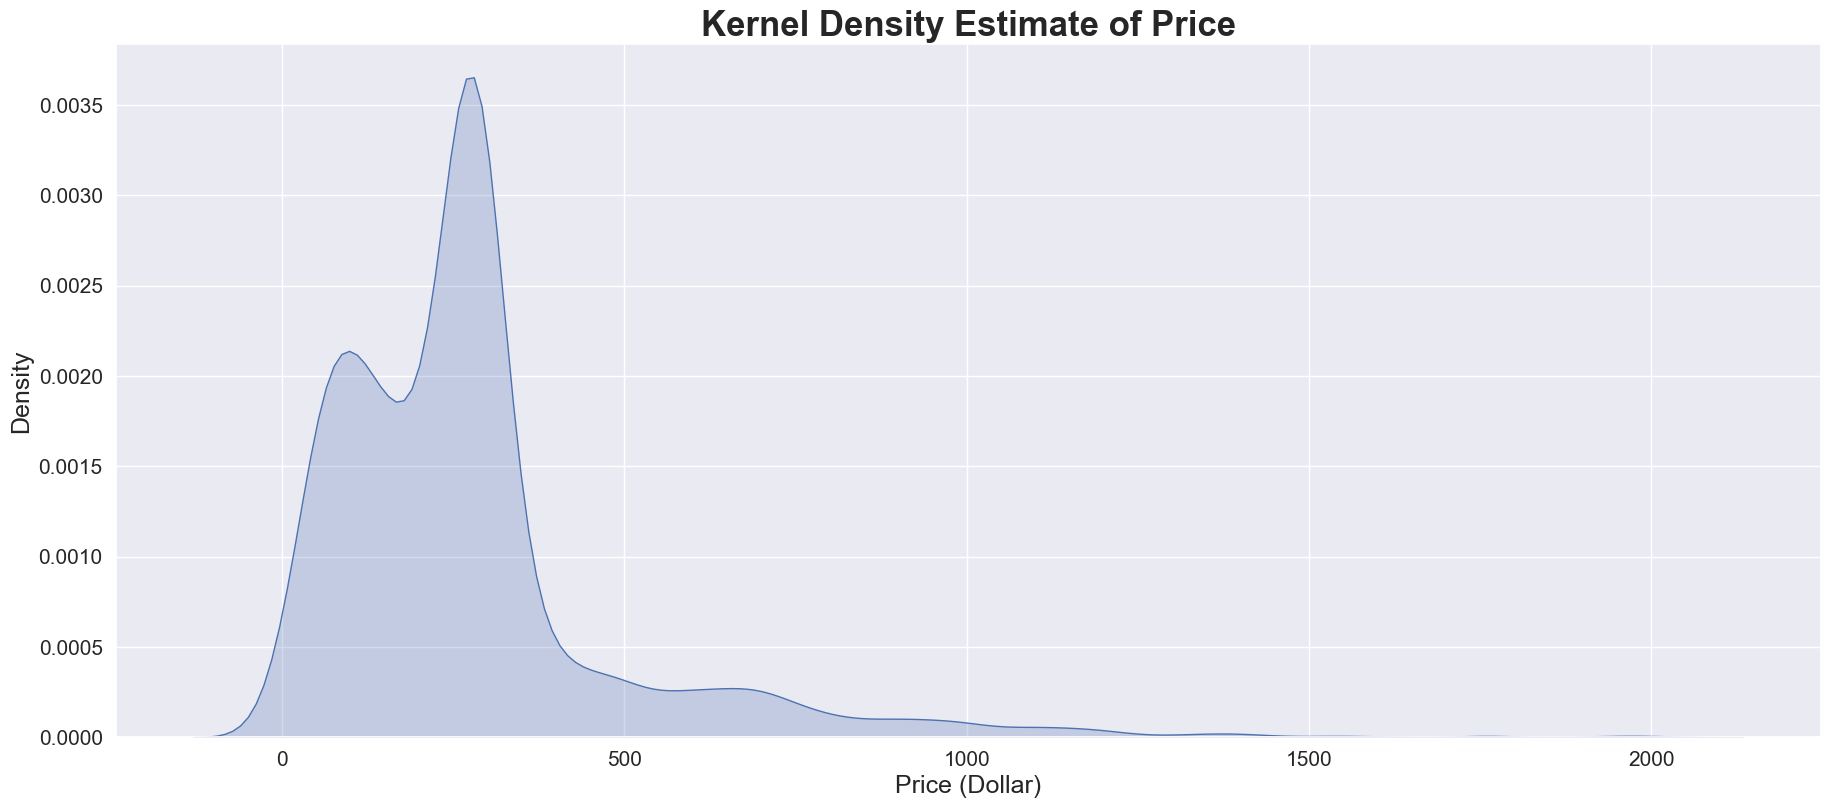

In [22]:
plt.figure(figsize=(22, 9))
sns.kdeplot(data['Price (Dollar)'], shade=True)
plt.title('Kernel Density Estimate of Price', fontweight = "bold", fontsize = 25)
plt.xlabel("Price (Dollar)", fontsize = 18)
plt.ylabel("Density", fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


### **10. Correlation Heatmap**

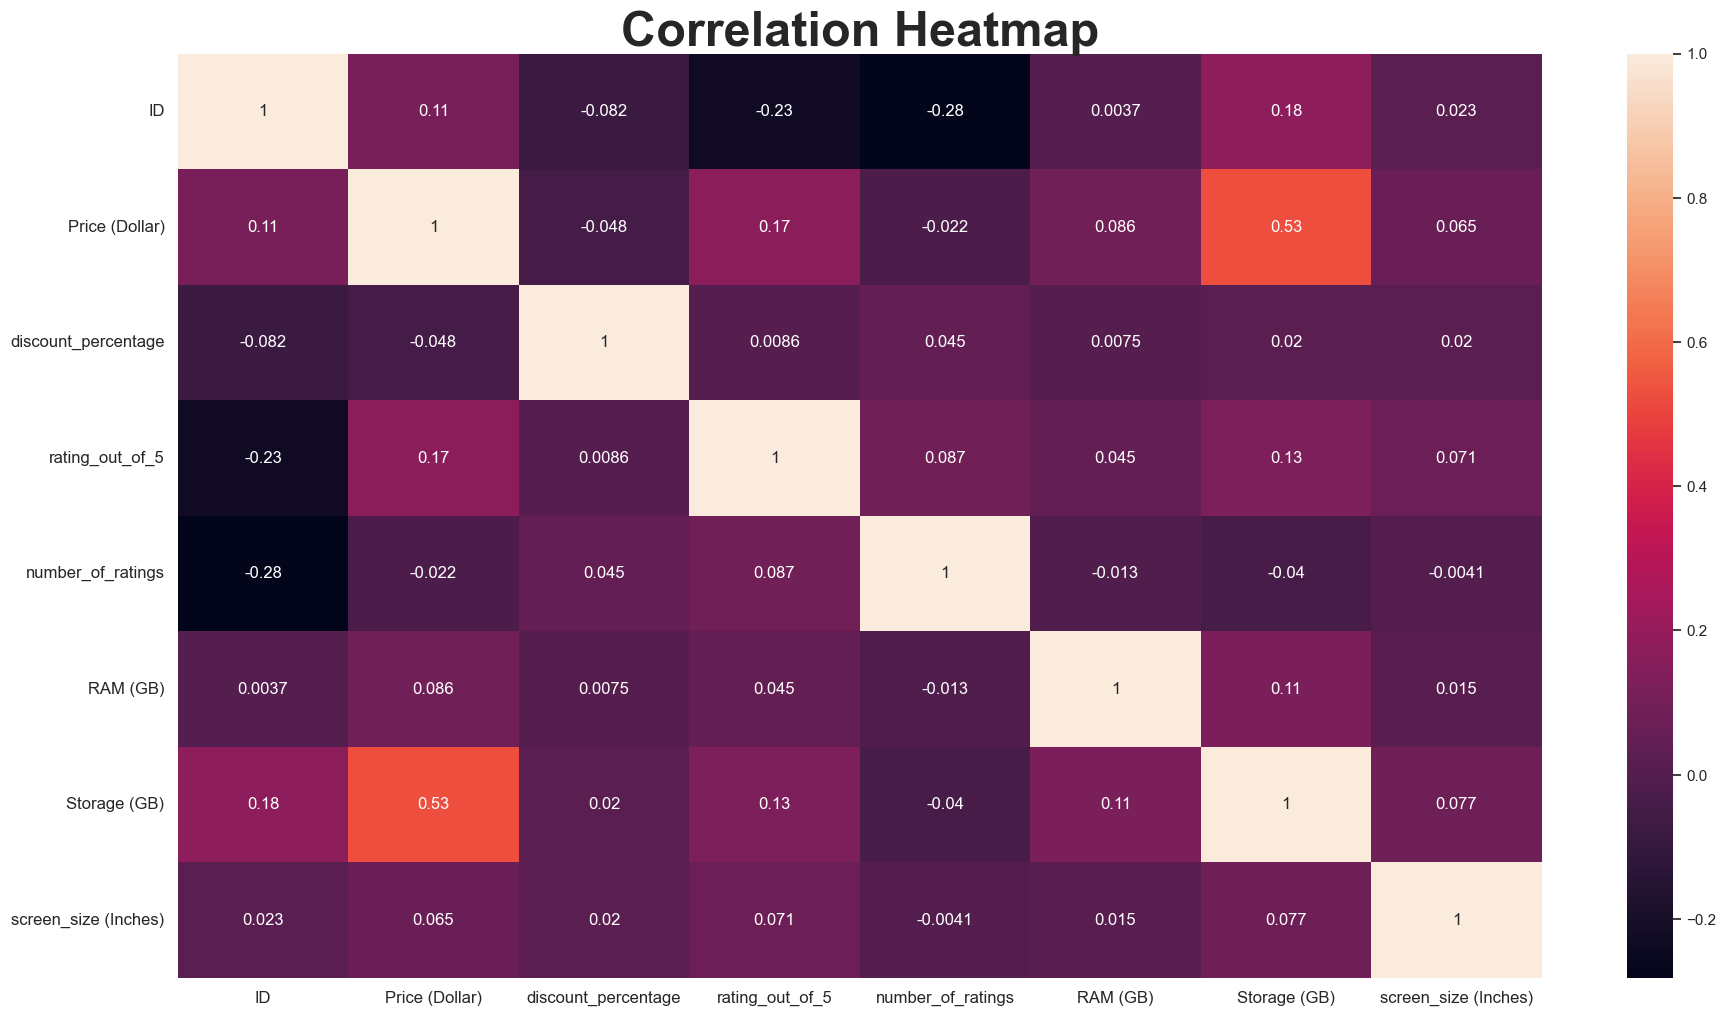

In [23]:
sns.set(rc = {'figure.figsize' : (22, 12)})
s = data.select_dtypes(include = "number").corr() 
sns.heatmap(s, annot = True)
plt.title("Correlation Heatmap", fontweight = "bold", fontsize = 35)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## **Step 6: Regression Analysis**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent variables and target
X = data[['rating_out_of_5', 'number_of_ratings', 'RAM (GB)', 'Storage (GB)', 'discount_percentage']]
y = data['Price (Dollar)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = reg_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': reg_model.coef_})
print(feature_importance)


Mean Squared Error: 35111.902665213725
R-squared: 0.3054060604143237
               Feature  Importance
0      rating_out_of_5   36.835910
1    number_of_ratings   -0.000455
2             RAM (GB)    0.286936
3         Storage (GB)    0.720111
4  discount_percentage   -1.192870


## **Step 7: Clustering Analysis**

  File "C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


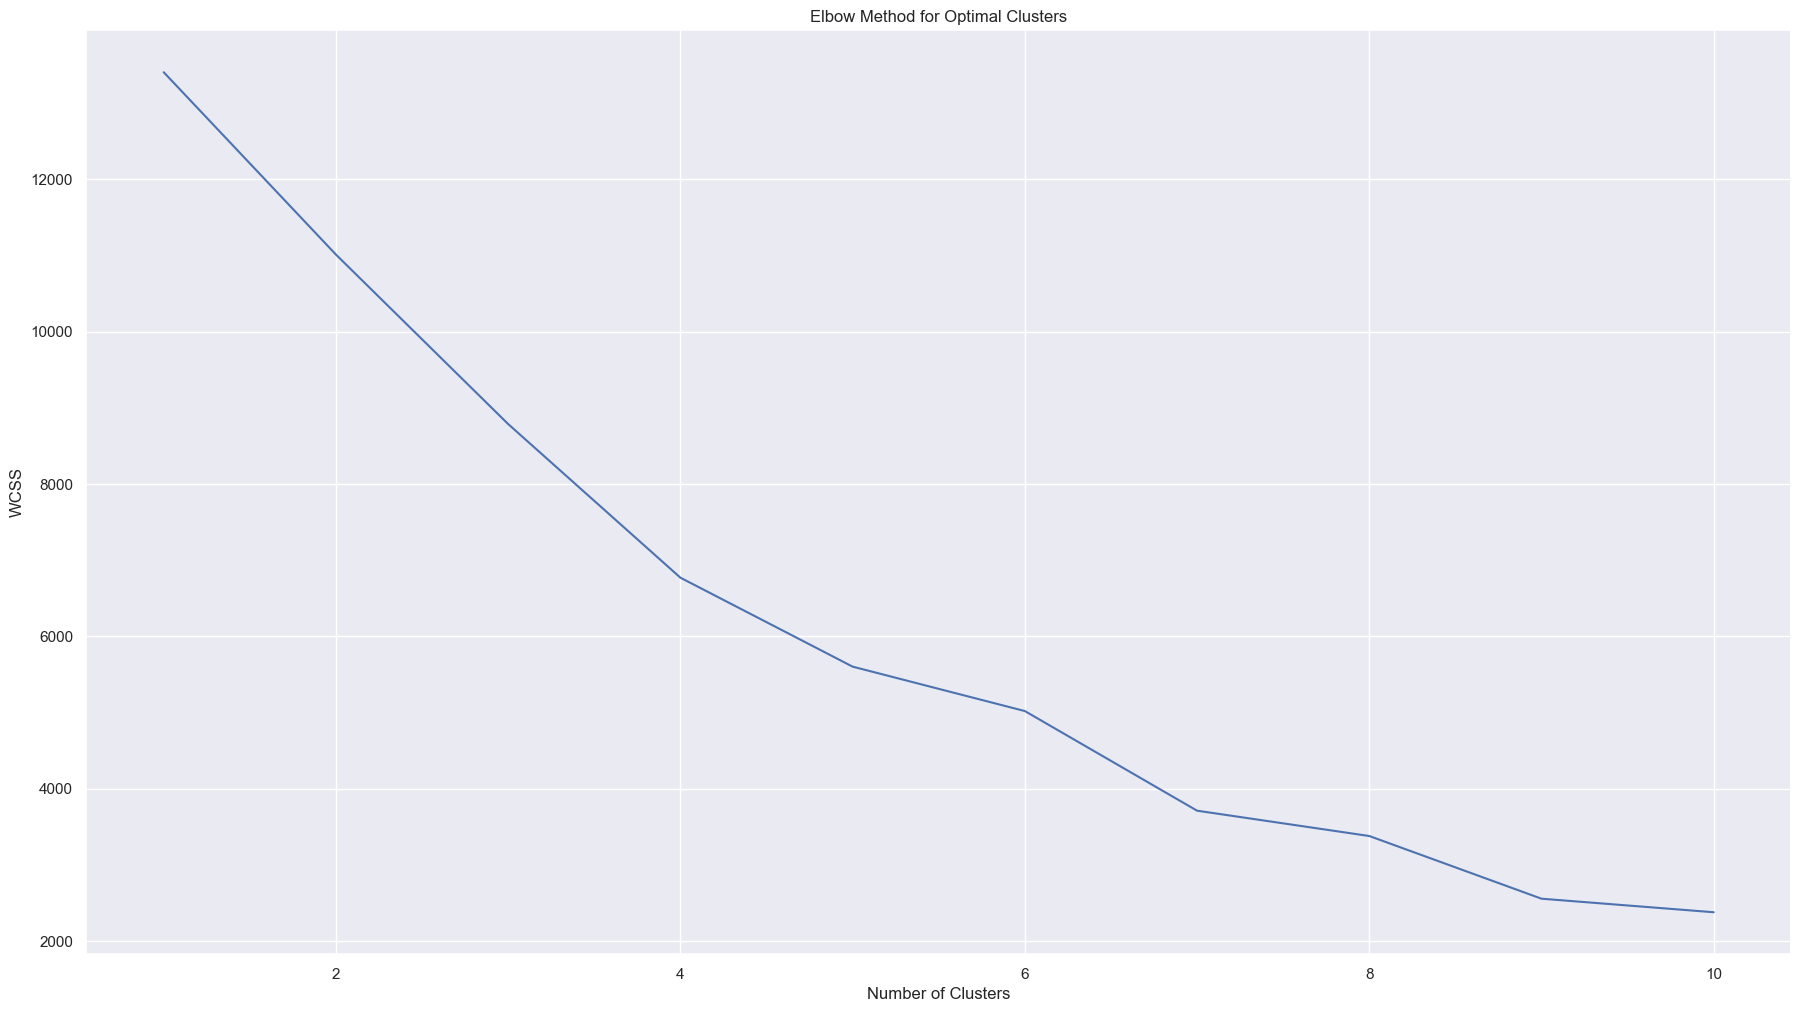

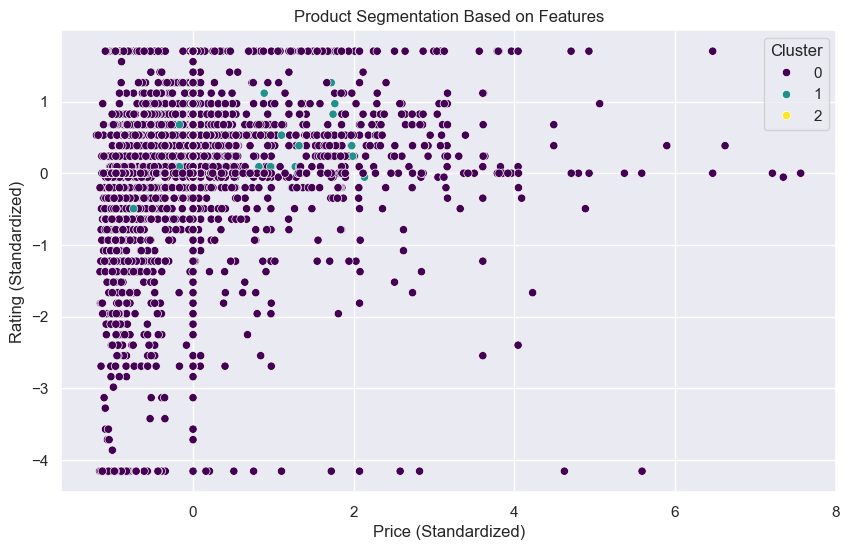

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Price (Dollar)', 'rating_out_of_5', 'RAM (GB)', 'number_of_ratings']])

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Cluster'], palette="viridis")
plt.title('Product Segmentation Based on Features')
plt.xlabel('Price (Standardized)')
plt.ylabel('Rating (Standardized)')
plt.show()


## **Step 8: Sentiment Analysis**

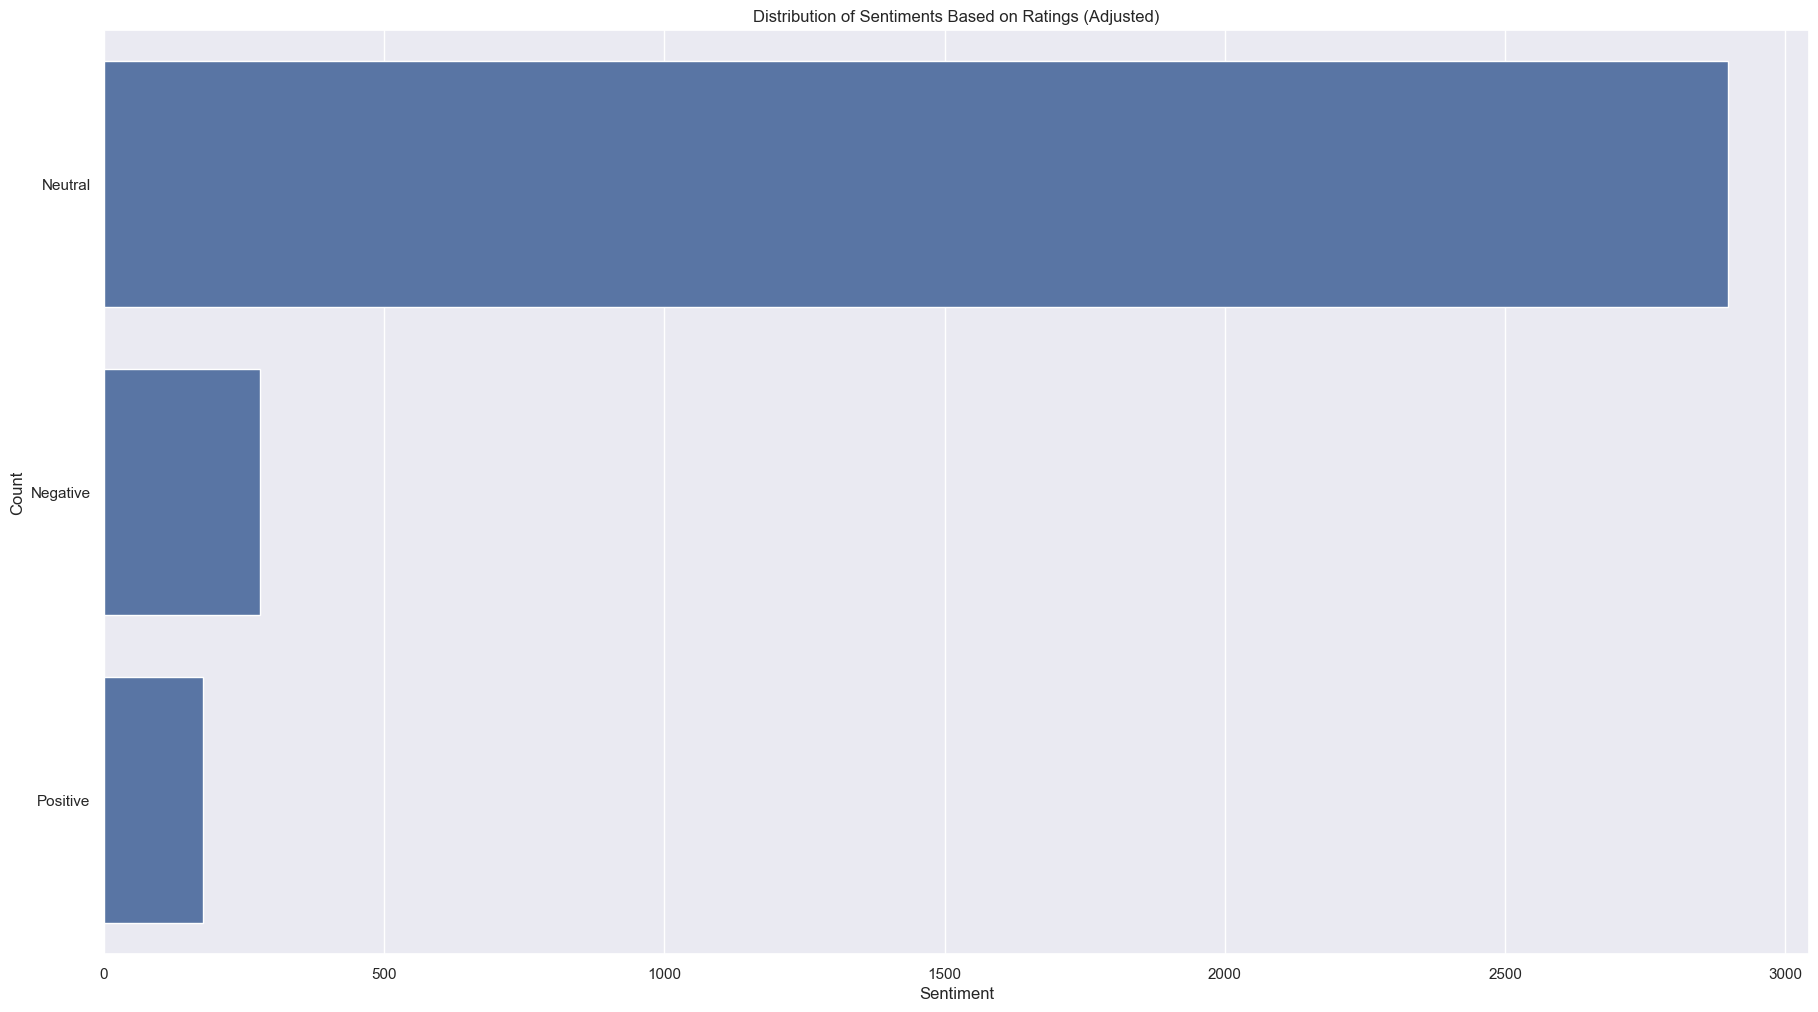

In [26]:
# define sentiment classification to broaden the Neutral category
def classify_sentiment(rating):
    if rating == 5.0:
        return 'Positive'
    elif rating >= 3.0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the new function
data['rating_sentiment'] = data['rating_out_of_5'].apply(classify_sentiment)

# Visualize the adjusted distribution of sentiments
sns.countplot(data['rating_sentiment'])
plt.title("Distribution of Sentiments Based on Ratings (Adjusted)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


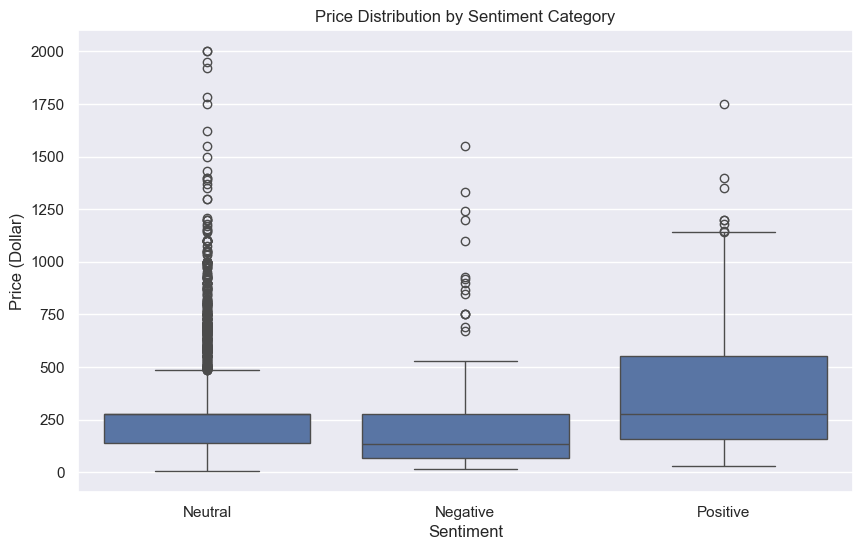

In [27]:
# Boxplot to show price distribution by sentiment category
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_sentiment', y='Price (Dollar)', data=data)
plt.title("Price Distribution by Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Price (Dollar)")
plt.show()
